In [1]:
import pandas as pd #pandas is for data structures and data analysis tools
import numpy as np #numpy is for scientific computing
import matplotlib.pyplot as plt #matplotlib is for plotting
from matplotlib.colors import LogNorm
import scipy.stats
from scipy.optimize import curve_fit
from IPython.display import Image
from IPython.display import display

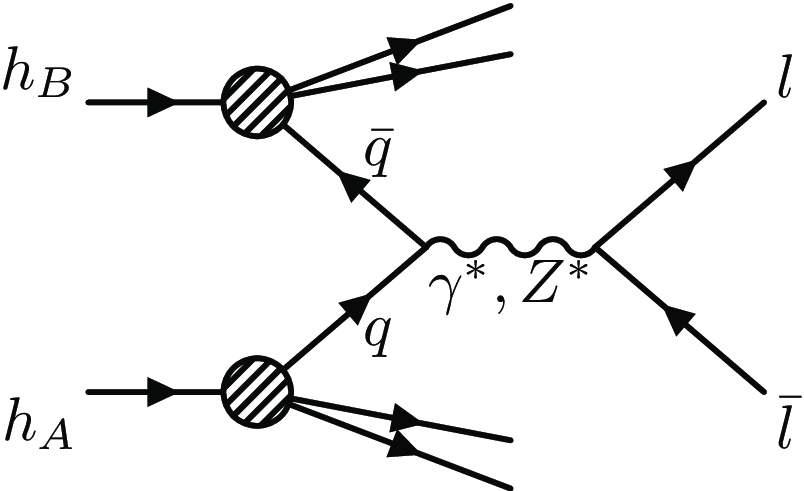

In [3]:
data = pd.read_csv('../data/Dimuon_DoubleMu.csv')

x = Image(filename='../images/DY.png', width=350)  
display(x) 

The csv file we will study contains proton-proton collision events where two muon candidates were observed in the CMS experiment in 2011. 
You can find the original csv file at the following link (along with more information on its contents) : https://opendata.cern.ch/record/5201

You can find more details on particle detection and reconstruction at CMS here : https://cms.cern/news/how-cms-detects-particles

In particular muon detection and reconstruction is covered here : https://cms.cern/index.php/detector/detecting-muons

Also a quick overview of the SM is here : https://home.cern/science/physics/standard-model

In this exercise we will look for events where a Z boson decays to two muons (the corresponding feynman diagram is shown above). 
You can check what a Z boson candidate event looks like in CMS here : https://opendata.cern.ch/record/307. For each event, two recorded muons (represented by the red tracks) are shown. 
Click on them to see the kinematic information that is measured. 
In particular think a little about the transverese momenta pt, the pseudorapidity $\eta$, and the $\phi$ angle of the muons.

Now back to the csv file, each row corresponds to one event and contains the kinematic information of the two muons recorded in CMS.  
We use Pandas to create a format which is useful for data analysis. 
Lets print the first few rows (events) and see what variables we have, the schema of the CMS experiment should help you understand the most important kinematic information. 

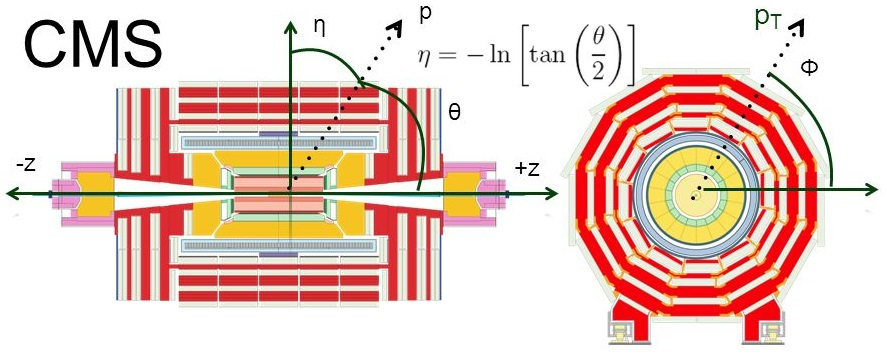

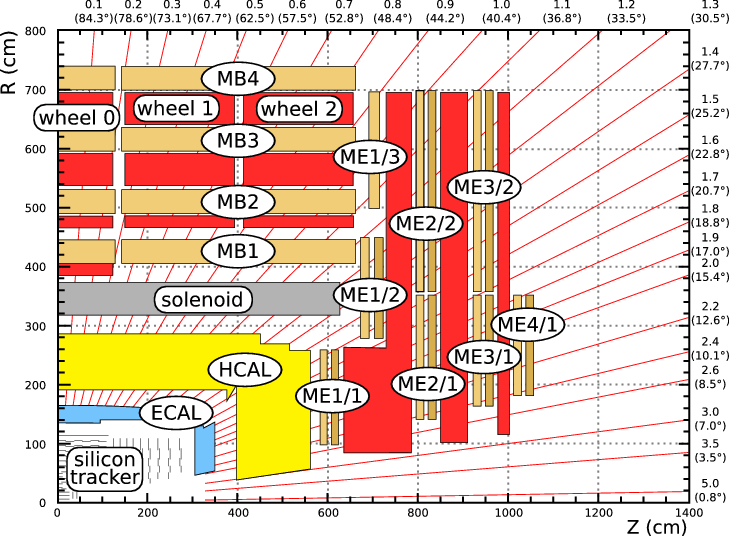

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,...,G,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922
1,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,...,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534
2,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,...,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636
3,165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,...,G,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774
4,165617,75947690,G,7.2751,0.1030,-5.5331,-4.7212,5.5340,-0.7736,-1.5522,...,G,7.3181,-0.3988,6.9408,2.2825,6.9523,0.3227,1.6282,1,14.3159


In [4]:
y = Image(filename='../images/CMS-COORD.jpg', width =800)
y2 = Image(filename='../images/CMS.png', width =400)

display(y, y2)

data.head()

Heres an example of how to calcluate the transverse momenta of the muons (component of momentum in the transverse plane) and plot them in a 2D histogram, some structure is visible here...

Can you add some 1D histograms of the Pt, Eta, Phi of the muons?  

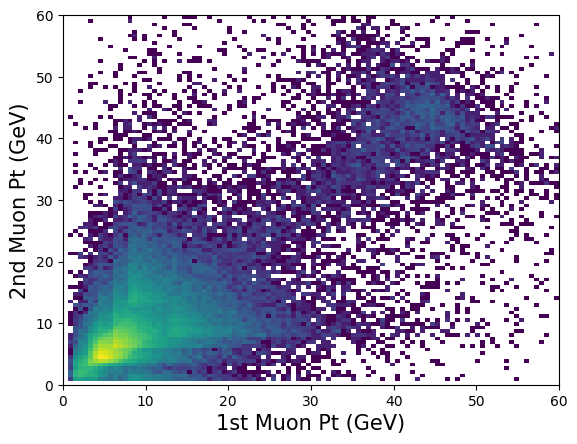

In [5]:
pt1 = np.sqrt(data.px1**2 + data.py1**2)
pt2 = np.sqrt(data.px2**2 + data.py2**2)

plt.hist2d(pt1,pt2, bins=(100, 100), range=[[0,60],[0,60]], norm=LogNorm(1))
plt.xlabel('1st Muon Pt (GeV)', fontsize = 15)
plt.ylabel('2nd Muon Pt (GeV)', fontsize = 15)

plt.show()

There are many particles (lets call them X) that can be produced in proton-proton collisions which rapidly decay into two muons.
With the CMS-detector we will measure the decay products of X, in this case the energy and momentum of the two muons. 
With this information the invariant mass of the two muons can be calculated (Remember $E^2 = P^2 + M^2)$ :

$M_{ll} = \sqrt{(E_1 + E_2)^2 - |P_1 + P_2 | ^2}$,

where $|P_1 + P_2 |^2=(P_{x1}+P_{x2})^2+(P_{y1}+P_{y2})^2+(P_{z1}+P_{z2})^2$.
 
If the muons were really produced from the decay of some particle X then the invariant mass will correspond to the mass of the parent particle ($M_{X} = m_{ll}$).

Now we just need to calculate the invariant mass for each pair of muons and plot a 1D histogram.
For a given particle X, we would expect to see a pronounced peak at the X mass with a width which is related to the lifetime of the particle. 
Width is a fundamental parameter of any unstable particle with a finite lifetime – the shorter the lifetime, the broader the width.

Can you see any evidence for a particle decay to two muons?

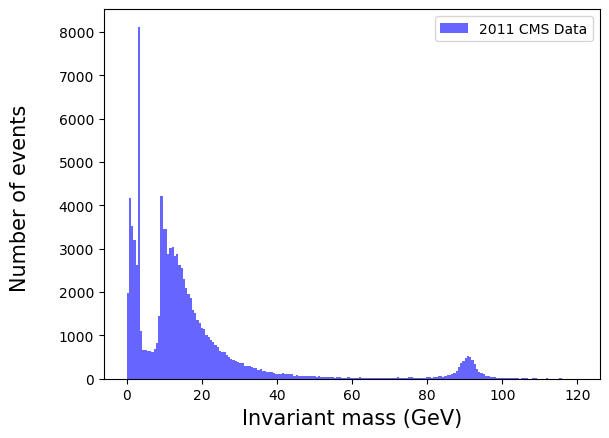

In [6]:
mass_squared = (data.E1 + data.E2)**2 - ((data.px1 + data.px2)**2 +(data.py1 + data.py2)**2  +(data.pz1 + data.pz2)**2)
Mll = np.sqrt(mass_squared)

plt.hist(Mll, 200, range = (0,120), alpha = 0.6 , color = 'blue',label = '2011 CMS Data')
#plt.hist(data.M, 200, range = (0,120), alpha = 0.6 , color = 'red',label = '2011 CMS Data')
plt.xlabel('Invariant mass (GeV)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.legend()
plt.show()


Remeber the Pt distributions earlier, lets divide the data into low and high muon Pt regions and see what the invariant mass distribution looks like....

By the way the invariant mass (M) is already included in the csv file, so you can just use that from now on :) 

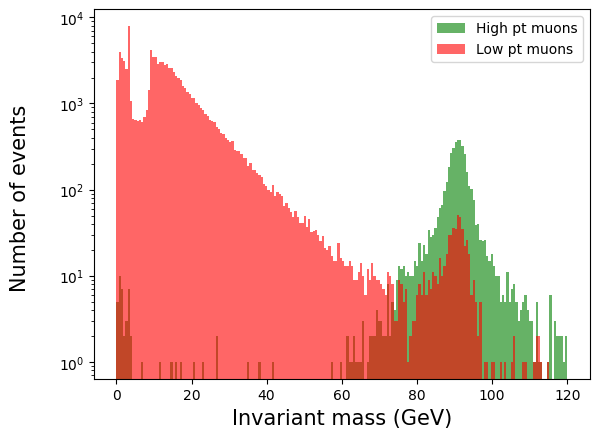

In [7]:
threshold = 30

Highpt = data[(pt1 >= threshold) & (pt2 >= threshold)]
lowpt = data[(pt1 < threshold) & (pt2 < threshold)]

#fig = plt.figure(figsize=(15, 10))

plt.hist(Highpt.M, 200, range = (0,120), alpha = 0.6 , color = 'green', label = 'High pt muons')
plt.hist(lowpt.M, 200, range = (0,120), alpha = 0.6 , color = 'red', label = 'Low pt muons')

plt.xlabel('Invariant mass (GeV)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.legend()
plt.yscale("log")
plt.show()

The two high Pt muons correspond to the resonance peak around 91 GeV. 
We have just selected a clean sample of Z boson decays!  
We usually apply cuts to important kinematic variables to select a phase space where the signal of interest is present.  

Lets plot the data in this mass region with the statistical uncertainties (the square root of the number of events) in each bin included. 

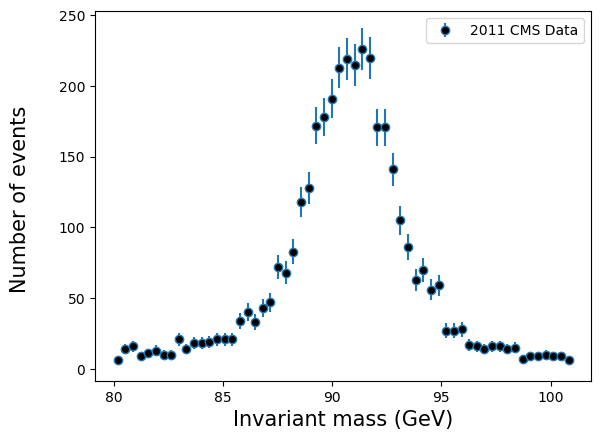

In [69]:
nBins = 60
minMass = 80
maxMass = 101

Z = Highpt[(Highpt.M >= minMass) & (Highpt.M < maxMass)]

# Some tricks to get the info we need to make a plot with statistical errors
y_counts, edges = np.histogram(Z.M, bins=nBins, range=(minMass,maxMass))
x_mass = (edges[1:] + edges[:-1]) / 2 # get the center of the mass bins

plt.errorbar(x_mass, y_counts, yerr=np.sqrt(y_counts),fmt='o', mfc='k',label="2011 CMS Data",)
plt.xlabel('Invariant mass (GeV)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.legend()
plt.show()

We can try to measure the mass and width of the resonance by fitting the peak we observe in the data. 

There are a number of functions we could define for this, lets try something simple like a gaussian

Fitted mass is 90.92 with uncertainty of 0.04
Fitted width is 5.34 with uncertainty of 0.31


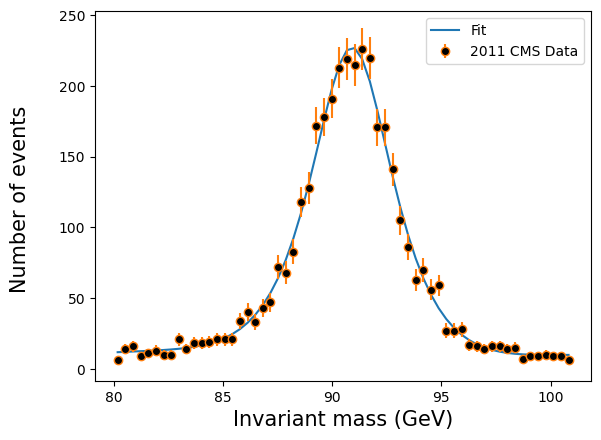

In [73]:

# Gaussian 
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# Double gaussian
def doublegauss(x, *p):
     A1, mu1, sigma1, A2, mu2, sigma2 = p
     g1 = [A1, mu1, sigma1]
     g2 = [A2, mu2, sigma2]
     s1 = gauss(x, *g1) 
     s2 = gauss(x, *g2)
     return s1+s2

# Breit-Wigner Distribution 
#http://arpg-serv.ing2.uniroma1.it/patera/didattica/fis_mod/trasp_riv/Glossario/node15.html
def bw(x, *p):
    A_bw, mu_bw, sigma_bw = p
    s = (A_bw*sigma_bw) / ((2.0*np.pi)*((x - mu_bw)**2 + (sigma_bw / 2.0)**2))
    return s # A*sigma (2.0*np.pi)*

# Voigtian : Convolution of a Breit-Wigner with a Gaussian 
# Pseudo-Voigtian approximation : linear combination of  Breit-Wigner with a Gaussian 
def pv(x, *p): 
    A_bw, mu_bw, sigma_bw, A, mu, sigma = p
    s1 = (A_bw*sigma_bw) / ((2.0*np.pi)*((x - mu_bw)**2 + (sigma_bw / 2.0)**2))
    s2 = A*np.exp(-(x-mu)**2/(2.*sigma**2))
    return s1 + s2

InitialGuess = [200,91,4,100,91,20]
bestFitParams, covarianceMatrix = curve_fit(pv, x_mass, y_counts, p0=InitialGuess,)
mZ = round(bestFitParams[1],2)
mZ_sigma = round(np.sqrt(covarianceMatrix[1][1]),2)
wZ = round(bestFitParams[2],2)
wZ_sigma = round(np.sqrt(covarianceMatrix[2][2]),2)

# double gauss (FWHM = 2.35 sigma)
#InitialGuess = [500,91,4,100,91,5]
#bestFitParams, covarianceMatrix = curve_fit(doublegauss, x_mass, y_counts, p0=InitialGuess,)
#mZ = round(bestFitParams[1],2)
#mZ_sigma = round(np.sqrt(covarianceMatrix[1][1]),2)
#wZ = 2.35*round(bestFitParams[2],2)
#wZ_sigma = 2.35*round(np.sqrt(covarianceMatrix[2][2]),2)

# For gauus (FWHM = 2.35 sigma) or bw
#InitialGuess = [300,91,4]
#bestFitParams, covarianceMatrix = curve_fit(gauss, x_mass, y_counts, p0=InitialGuess)
#mZ = round(bestFitParams[1],2)
#mZ_sigma = round(np.sqrt(covarianceMatrix[1][1]),2)
#wZ = round(bestFitParams[2],2)
#wZ_sigma = round(np.sqrt(covarianceMatrix[2][2]),2)

print("Fitted mass is "+str(mZ)+" with uncertainty of "+str(mZ_sigma))
print("Fitted width is "+str(wZ)+" with uncertainty of "+str(wZ_sigma))

# Get the fitted curve
fit = pv(x_mass, *bestFitParams)
plt.plot(x_mass, fit, label='Fit')

plt.errorbar(x_mass, y_counts, yerr=np.sqrt(y_counts),fmt='o', mfc='k',label="2011 CMS Data",)
plt.xlabel('Invariant mass (GeV)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.legend()
plt.show()


How good is the fit to the data?

One way to visualise this is by checking the residual difference between the fit and the data :

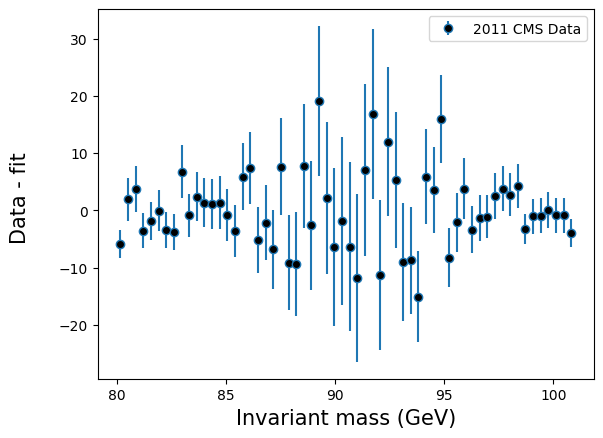

In [74]:
residuals = y_counts - fit

plt.errorbar(x_mass, residuals, yerr=np.sqrt(y_counts),fmt='o', mfc='k',label="2011 CMS Data",)
plt.xlabel('Invariant mass (GeV)', fontsize = 15)
plt.ylabel('Data - fit \n', fontsize = 15)
plt.legend()
plt.show()

Even better is to quantify the quality of the fit in one number.

For this we sum over the residual difference (divided by the statistical uncertainty) in each bin to get the $\chi^{2}$ of the fit. 

This is then normalised by dividing by the number of degrees of freedom (#bins - #parameters in the fit).


In [75]:
def getChiSq(residuals, var):
    chiSq = 0.0
    for bin in range(0, len(residuals)):
     if (var[bin] != 0):
      chiSq += (residuals[bin]/var[bin])**2
    return chiSq

chi2 = getChiSq(residuals, np.sqrt(y_counts))
ndof = len(residuals) - len(InitialGuess)

print(chi2/ndof)

0.9448831286905874


So what do we conclude about our choice of function? Does it give a good description of the data? 

Can you think of a better function to use? How does the Z boson mass and width measured compare to the PDG values?

Finally, there is more that just the Z boson resonance to be discovered here. 
Take a look at lower invariant masses (and lower muon Pt) and see what you can find.
Bonus points for measured masses and widths compared to PDG values.  